In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
import numpy as np
from skimage.io import imshow
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.datasets import fetch_lfw_people

In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', 
'#137e6d', '#be0119', '#3b638c', '#af6f09', '#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', 
'#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

cmap = mcolors.LinearSegmentedColormap.from_list("", ["#82cafc", "#069af3", "#0485d1", colors[0], colors[8]])

In [4]:
def plot_gallery(images, h, w, n_row=3, n_col=4, titles=None):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        if titles != None:
            plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [5]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.8)

In [6]:
lfw_people.images.shape

(1288, 100, 75)

In [7]:
n_samples, h, w = lfw_people.images.shape

In [8]:
X = lfw_people.data

In [9]:
X.shape

(1288, 7500)

In [10]:
n_features = X.shape[1]

In [11]:
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

In [12]:
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)
print(target_names)

n_samples: 1288
n_features: 7500
n_classes: 7
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


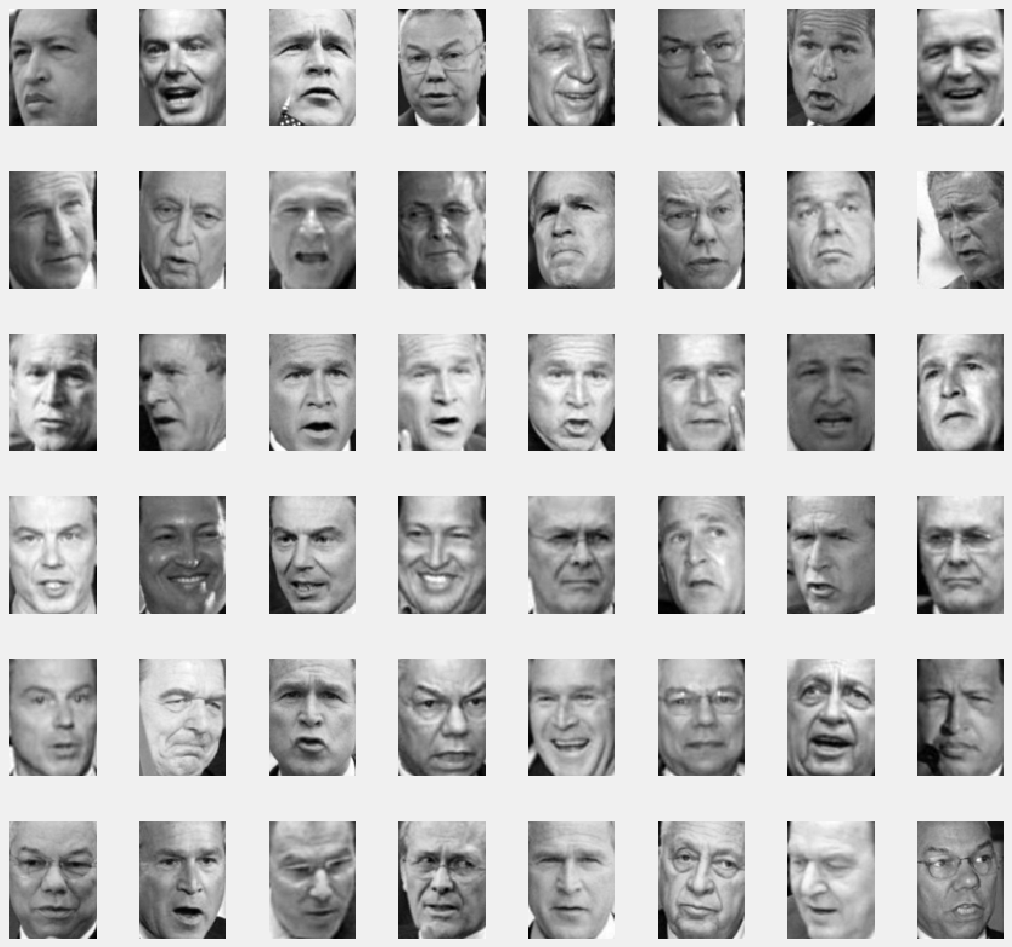

In [13]:
plot_gallery(X, h, w, n_row=6, n_col=8)

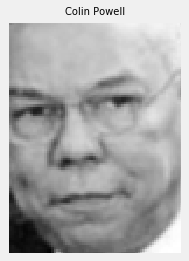

In [14]:
i = 610
plt.figure(figsize=(4,4))
plt.imshow(X[i, :].reshape((h, w)), interpolation='nearest', cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.title(target_names[y[i]])
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
print("Xtrain:",X_train.shape)
print("X_test:",X_test.shape)

Xtrain: (966, 7500)
X_test: (322, 7500)


Calcola PCA sul training set

In [16]:
n_components = 150

In [17]:
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)

In [18]:
eigenfaces = pca.components_.reshape((n_components, h, w))

In [19]:
eigenfaces.shape

(150, 100, 75)

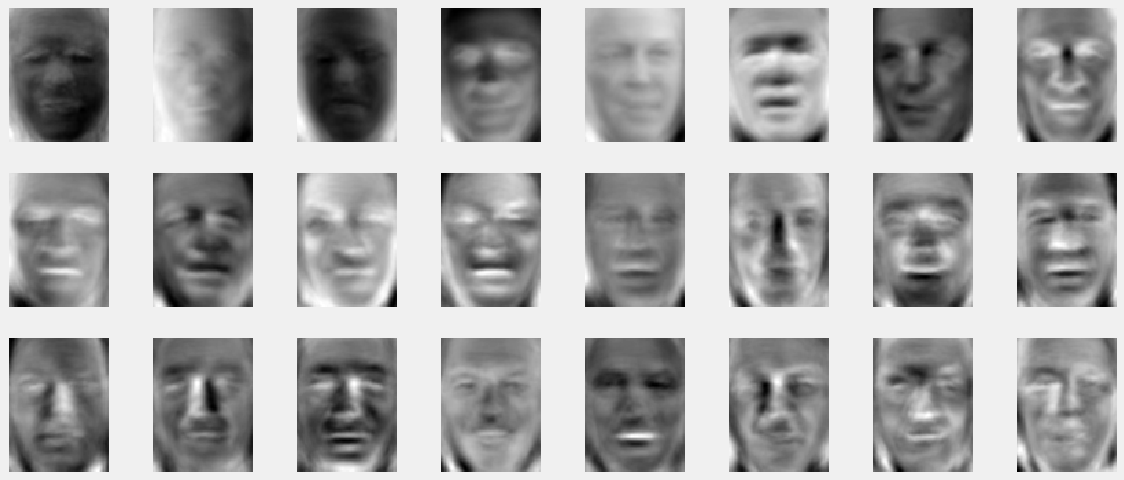

In [20]:
fig, axes = plt.subplots(3, 8, figsize=(18, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(100, 75), cmap=plt.cm.gray)
    ax.set_xticks(())
    ax.set_yticks(())

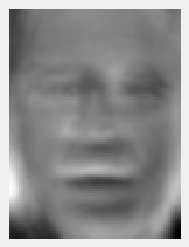

In [22]:
i = 12
plt.figure(figsize=(4,4))
plt.imshow(eigenfaces[i], cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()

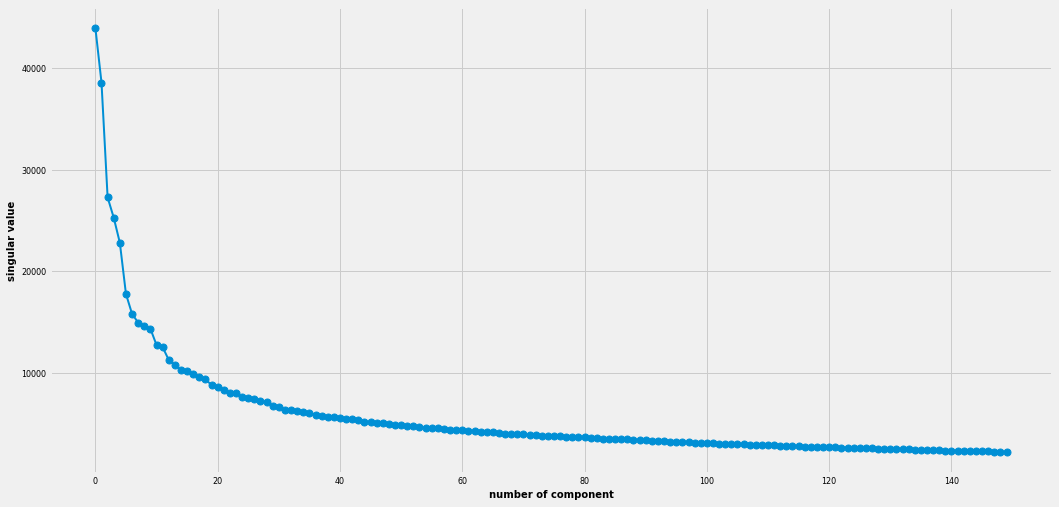

In [23]:
plt.figure(figsize=(16,8))
plt.plot(pca.singular_values_, marker='o', markersize=7)
plt.xlabel('number of component')
plt.ylabel('singular value')
plt.show()

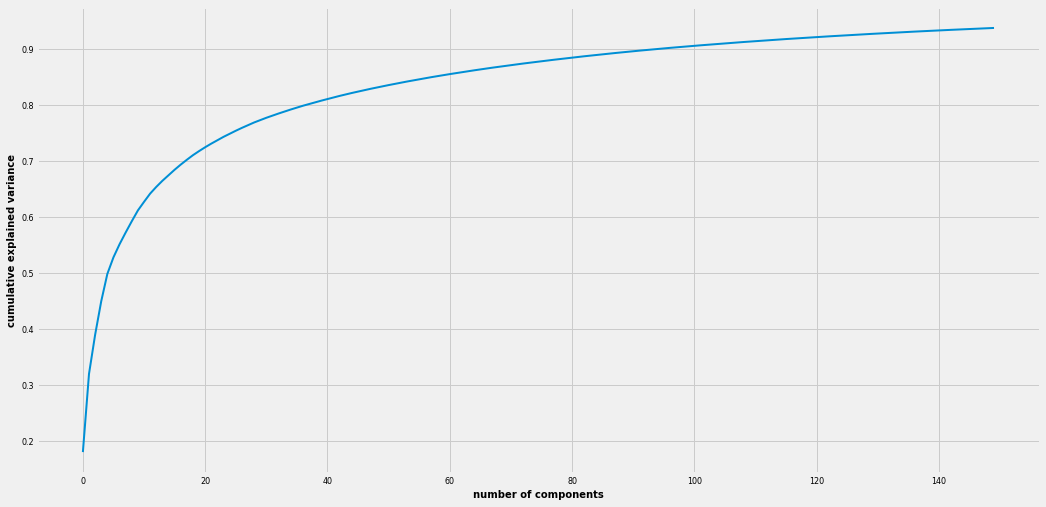

In [24]:
plt.figure(figsize=(16,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

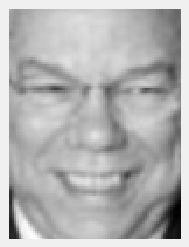

In [26]:
i = 612
plt.figure(figsize=(4,4))
plt.imshow(X[i, :].reshape((h, w)), interpolation='nearest', cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()

In [29]:
pca1 = PCA(n_components=100, svd_solver='randomized', whiten=True).fit(X_train)
f = pca1.transform(X[i,:].reshape(1,-1))
f1 = pca1.inverse_transform(f)

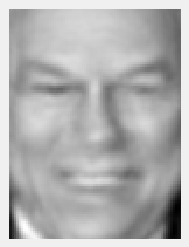

In [30]:
plt.figure(figsize=(4,4))
plt.imshow(f1.reshape(h,w), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()

In [31]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [32]:
X_train_rec = pca.inverse_transform(X_train_pca)

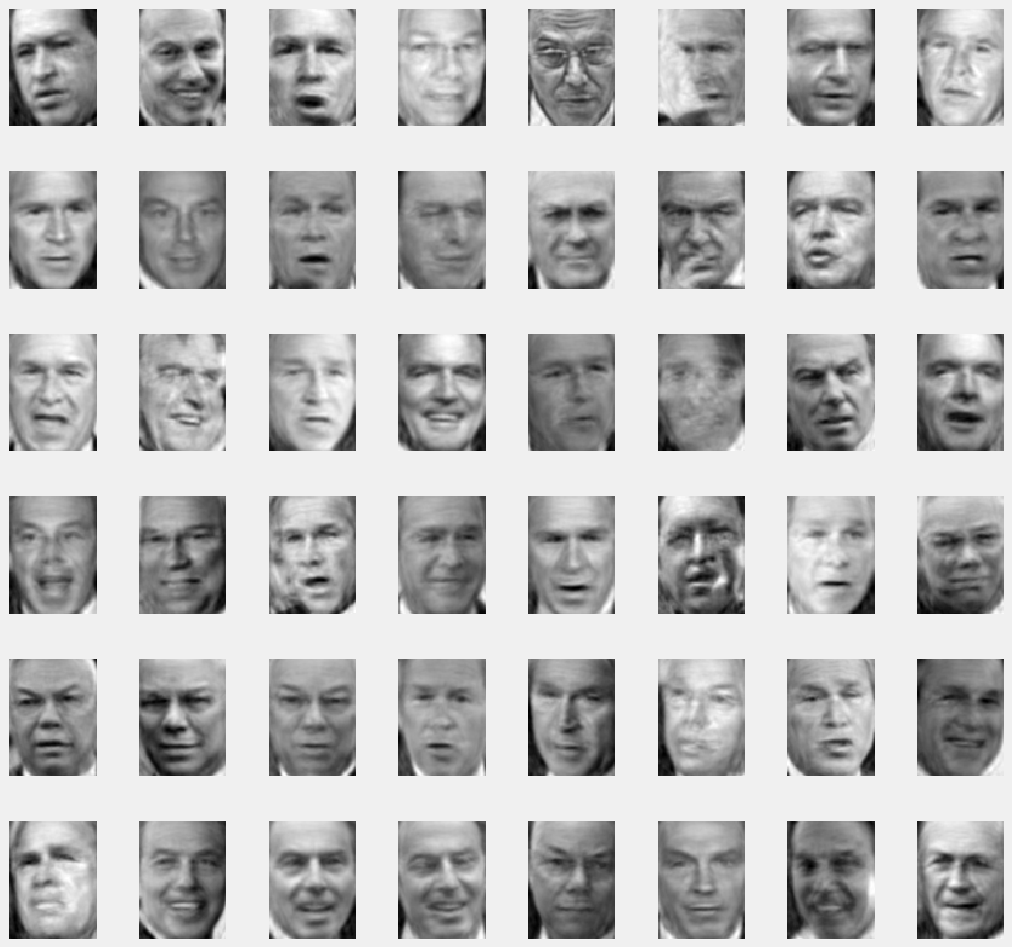

In [33]:
plot_gallery(X_train_rec, h, w, n_row=6, n_col=8)

In [34]:
param_grid = {'C': [7.5e1, 1e2, 2.5e2],
              'gamma': [0.0012, 0.00125, 0.0013] }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, scoring='accuracy')
clf = clf.fit(X_train_pca, y_train)

In [35]:
best_params = clf.best_params_
best_score = clf.best_score_
print('C = {0:5.3f}, gamma = {1:5.3f}, accuracy = {2:5.3f}'.format(best_params['C'], best_params['gamma'], best_score))

C = 75.000, gamma = 0.001, accuracy = 0.789


In [38]:
y_pred = clf.predict(X_test_pca)

print(target_names)
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
[[ 18   3   0   1   2   0   0]
 [  0  47   1   5   0   0   1]
 [  1   1  27   6   1   1   0]
 [  0   6   4 114   0   0   3]
 [  0   1   0   3  15   0   4]
 [  0   2   0   0   2  18   0]
 [  0   4   0   2   3   0  26]]


In [39]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

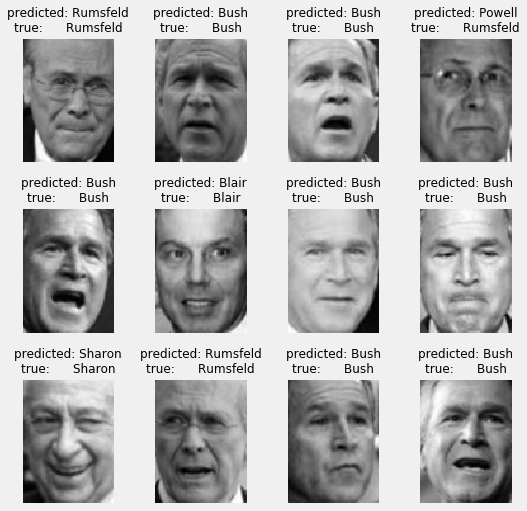

In [40]:
prediction_titles = [title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])]

plot_gallery(X_test, h, w, titles=prediction_titles)

In [41]:
pca2 = PCA(n_components=2, svd_solver='randomized', whiten=True).fit(X_train)
X_train_2 = pca2.transform(X_train) 
X_test_2 = pca2.transform(X_test) 

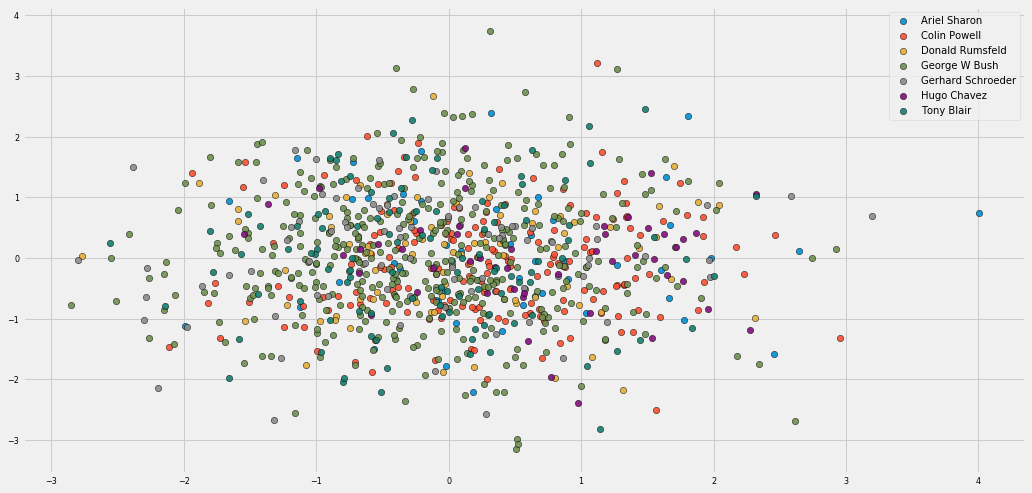

In [42]:
fig = plt.figure(figsize=(16,8))
for i in range(7):
    idx = np.where(y_train == i)
    plt.scatter(X_train_2[idx, 0], X_train_2[idx, 1], c=colors[i], s=40, edgecolors='k', 
                alpha = .9, label='{0:s}'.format(target_names[i]),cmap=cmap)
plt.legend()
plt.show()

In [43]:
param_grid = {'C': [7.5e1, 1e2, 2.5e2],'gamma': [0.0012, 0.00125, 0.0013] }
clf2 = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, scoring='accuracy')
clf2 = clf.fit(X_train_2, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


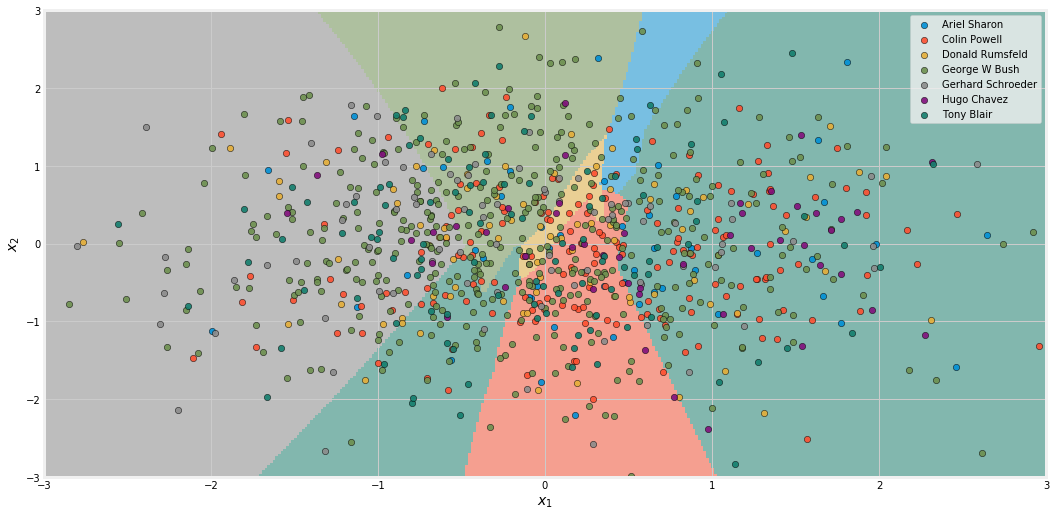

In [89]:
xx, yy = np.meshgrid(np.linspace(-4, 4, 500), np.linspace(-4, 4, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
pred = np.array([np.argmax(Z[i,:]) for i in range(Z.shape[0])]).reshape(xx.shape)

cmap = mcolors.ListedColormap(colors[0:7])
bounds=[0,1,2,3,4,5,6]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

fig = plt.figure(figsize=(16,8))
fig.patch.set_facecolor('white')
ax = fig.gca()
imshow_handle = plt.imshow(pred, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', alpha=.5, cmap=cmap, norm=norm)

for i in range(7):
    idx = np.where(y_train == i)
    plt.scatter(X_train_2[idx, 0], X_train_2[idx, 1], c=colors[i], s=40, edgecolors='k', 
                alpha = .9, label='{0:s}'.format(target_names[i]),cmap=cmap)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.legend()
plt.show()